In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Synthetic_Employee_Data (1).csv', encoding='latin1')
df

,Employee_ID,Name,Age,Department,Salary,Years_at_Company,Performance_Score,Last_Promotion_Year,Training_Hours,Sick_Days,Work_Location,Gender,Job_Level,Education_Level
0,1,Charlie,22,HR,38258,12,2.53,2019,143,3,Hybrid,Female,Mid,Master's
1,2,Alice,57,HR,52349,17,4.82,2022,85,4,Onsite,Other,Mid,PhD
2,3,Eve,31,Sales,53760,14,4.14,2022,102,1,Remote,Other,Mid,High School
3,4,Diana,23,Marketing,48063,5,3.46,2019,29,4,Hybrid,Female,Entry,PhD
4,5,Charlie,41,IT,74368,15,4.45,2018,107,3,Remote,Female,Senior,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Diana,23,HR,92634,10,3.30,2020,106,8,Onsite,Male,Entry,PhD
2996,2997,Charlie,38,IT,37041,13,1.08,2022,16,1,Hybrid,Male,Entry,Bachelor's
2997,2998,Bob,22,Sales,119045,5,1.40,2020,105,14,Remote,Female,Mid,High School
2998,2999,Bob,39,Marketing,92548,15,2.66,2019,106,8,Remote,Other,Mid,High School


In [3]:
df.head()

,Employee_ID,Name,Age,Department,Salary,Years_at_Company,Performance_Score,Last_Promotion_Year,Training_Hours,Sick_Days,Work_Location,Gender,Job_Level,Education_Level
0,1,Charlie,22,HR,38258,12,2.53,2019,143,3,Hybrid,Female,Mid,Master's
1,2,Alice,57,HR,52349,17,4.82,2022,85,4,Onsite,Other,Mid,PhD
2,3,Eve,31,Sales,53760,14,4.14,2022,102,1,Remote,Other,Mid,High School
3,4,Diana,23,Marketing,48063,5,3.46,2019,29,4,Hybrid,Female,Entry,PhD
4,5,Charlie,41,IT,74368,15,4.45,2018,107,3,Remote,Female,Senior,PhD


In [ ]:
print(df.isnull().sum())

Employee_ID            0
Name                   0
Age                    0
Department             0
Salary                 0
Years_at_Company       0
Performance_Score      0
Last_Promotion_Year    0
Training_Hours         0
Sick_Days              0
Work_Location          0
Gender                 0
Job_Level              0
Education_Level        0
dtype: int64


: 

In [42]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [43]:
df.dropna(inplace=True)

In [45]:
mean_salary = df['Salary'].mean()
print(mean_salary)

224864141.0


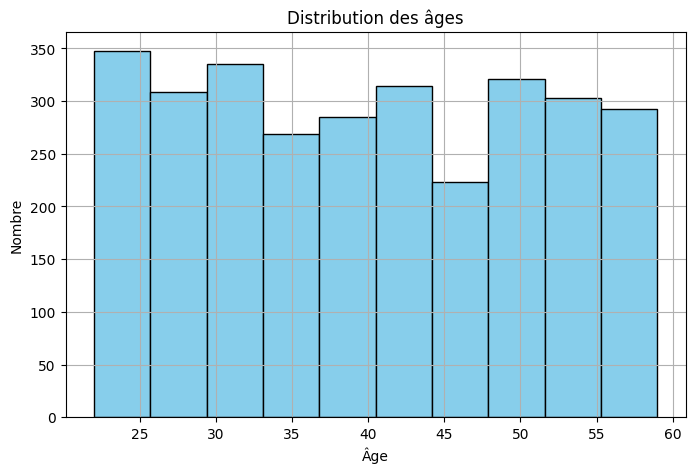

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre')
plt.grid(True)
plt.show()

In [9]:
print("Statistiques sur l'âge :")
print(f"Âge moyen : {df['Age'].mean():.2f}")
print(f"Âge médian : {df['Age'].median()}")
print(f"Écart-type de l'âge : {df['Age'].std():.2f}")

Statistiques sur l'âge :
Âge moyen : 40.06
Âge médian : 40.0
Écart-type de l'âge : 10.98


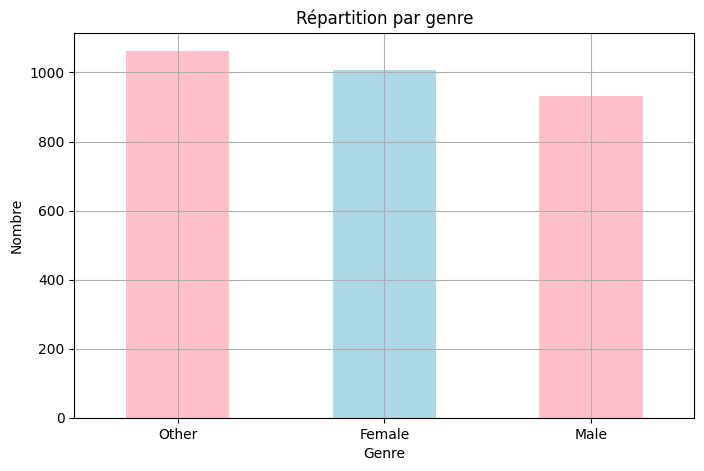

In [10]:
plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Répartition par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

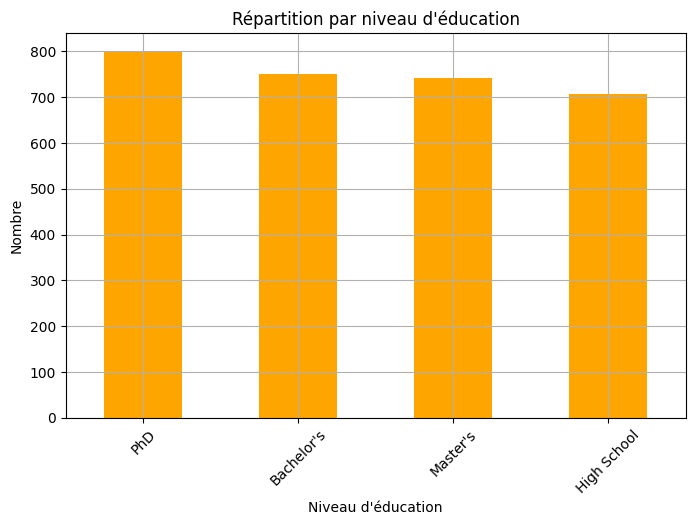

In [11]:
plt.figure(figsize=(8, 5))
df['Education_Level'].value_counts().plot(kind='bar', color='orange')
plt.title('Répartition par niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [13]:
performance_by_dept_and_level = df.groupby(['Department', 'Job_Level'])['Performance_Score'].mean().reset_index()

In [14]:
print(performance_by_dept_and_level)

   Department Job_Level  Performance_Score
0     Finance     Entry           2.922658
1     Finance   Manager           2.921933
2     Finance       Mid           2.920576
3     Finance    Senior           2.942448
4          HR     Entry           2.869348
5          HR   Manager           2.975325
6          HR       Mid           3.025313
7          HR    Senior           3.019111
8          IT     Entry           2.867500
9          IT   Manager           2.870000
10         IT       Mid           3.094528
11         IT    Senior           3.044786
12  Marketing     Entry           3.085177
13  Marketing   Manager           2.862157
14  Marketing       Mid           2.888291
15  Marketing    Senior           2.829571
16      Sales     Entry           3.111361
17      Sales   Manager           3.000641
18      Sales       Mid           3.066024
19      Sales    Senior           2.809179


Text(0.5, 1.0, 'Scores de performance par département et niveau de poste')

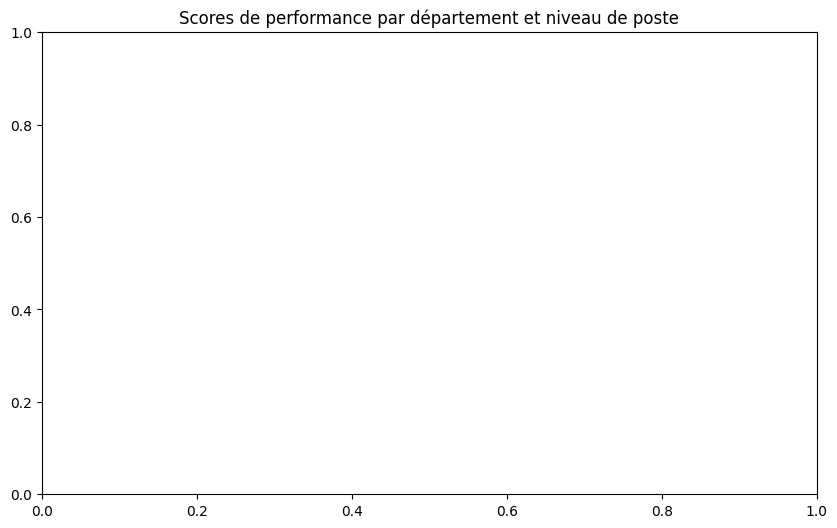

In [15]:
plt.figure(figsize=(10, 6))
plt.title('Scores de performance par département et niveau de poste')

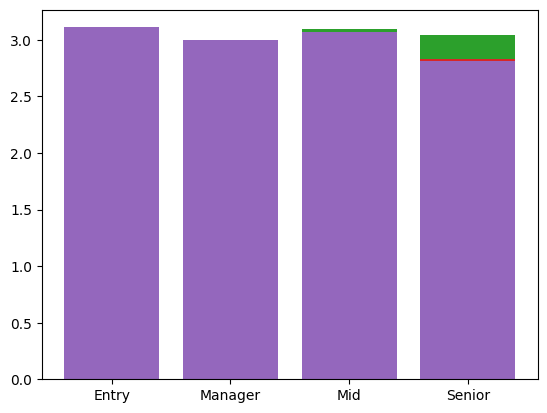

In [17]:
for department in performance_by_dept_and_level['Department'].unique():
    subset = performance_by_dept_and_level[performance_by_dept_and_level['Department'] == department]
    plt.bar(subset['Job_Level'], subset['Performance_Score'], label=department)

C:\Users\symph\AppData\Local\Temp\ipykernel_21072\201623604.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Département')


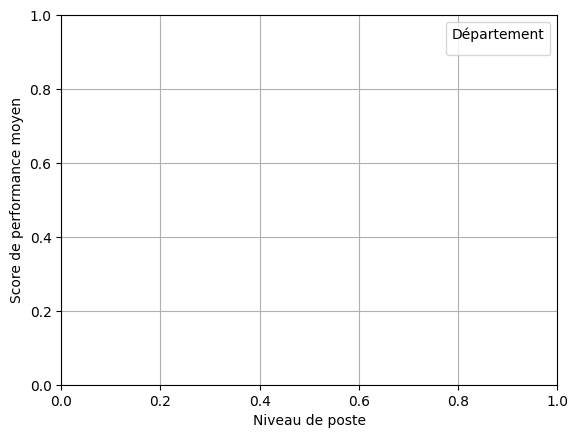

In [18]:
plt.xlabel('Niveau de poste')
plt.ylabel('Score de performance moyen')
plt.legend(title='Département')
plt.grid(True)
plt.show()

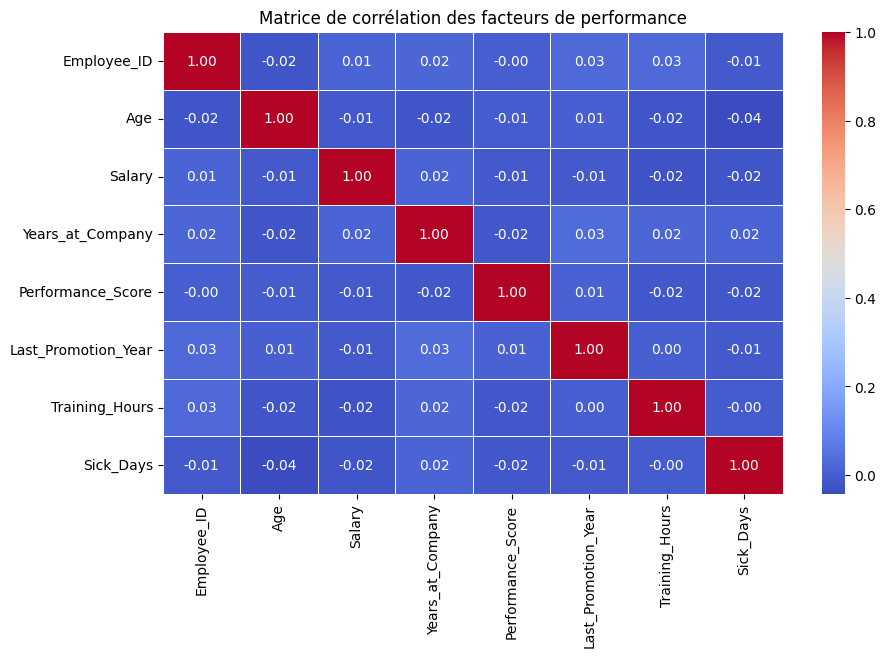

In [23]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des facteurs de performance')
plt.show()

In [24]:
low_performance = df[df['Performance_Score'] <= 2]

In [25]:
high_sick_days = df[df['Sick_Days'] > 10]

In [26]:
at_risk_employees = df[(df['Performance_Score'] <= 2) & (df['Sick_Days'] > 10)]

In [27]:
print(at_risk_employees)

      Employee_ID     Name  Age Department  Salary  Years_at_Company  \
11             12      Eve   36         IT  101583                10   
21             22    Alice   22         IT   69801                14   
36             37  Charlie   47         HR   84535                17   
47             48      Eve   34         IT   75497                 9   
51             52  Charlie   23    Finance   49379                17   
...           ...      ...  ...        ...     ...               ...   
2955         2956    Diana   54  Marketing   51938                 2   
2965         2966      Eve   51         HR  101806                 5   
2976         2977      Eve   51      Sales   69881                 4   
2981         2982      Bob   58      Sales  111253                11   
2997         2998      Bob   22      Sales  119045                 5   

      Performance_Score  Last_Promotion_Year  Training_Hours  Sick_Days  \
11                 1.51                 2019             134

In [28]:
long_term_employees = df[df['Years_at_Company'] > 10]

In [29]:
long_term_stats = long_term_employees[['Age', 'Performance_Score', 'Salary', 'Training_Hours', 'Sick_Days']].mean()
print(long_term_stats)

Age                     39.807339
Performance_Score        2.954757
Salary               75474.161609
Training_Hours         100.966126
Sick_Days                6.995766
dtype: float64


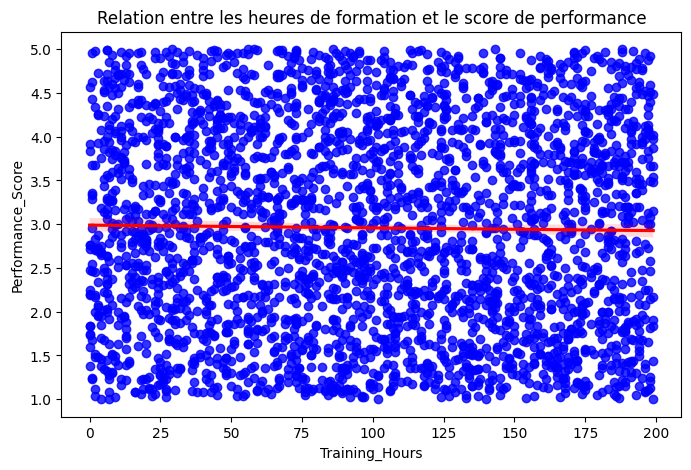

In [30]:
training_performance_corr = df[['Training_Hours', 'Performance_Score']].corr()
plt.figure(figsize=(8, 5))
sns.regplot(x='Training_Hours', y='Performance_Score', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Relation entre les heures de formation et le score de performance')
plt.show()

In [31]:
recent_promotion = df[df['Last_Promotion_Year'] == 2024]

In [32]:
pre_promotion_performance = df[df['Last_Promotion_Year'] < 2024]['Performance_Score'].mean()
post_promotion_performance = recent_promotion['Performance_Score'].mean()

In [33]:
print(f"Performance avant promotion : {pre_promotion_performance:.2f}")
print(f"Performance après promotion : {post_promotion_performance:.2f}")

Performance avant promotion : 2.96
Performance après promotion : nan
